device : cpu
X torch.Size([4, 2])
layer1.weight tensor([[0.9169, 0.5885],
        [0.2650, 0.7832],
        [0.9180, 0.8274],
        [0.7280, 0.2605]])
layer1.bias tensor([0.1223, 0.3860, 0.8401, 0.2782])
layer2.weight tensor([[0.9118, 0.2608, 0.7664, 0.2615]])
layer2.bias tensor([0.0699])
Epoch 1000/10000, Loss: 0.66581
Epoch 2000/10000, Loss: 0.56066
Epoch 3000/10000, Loss: 0.32269
Epoch 4000/10000, Loss: 0.12813
Epoch 5000/10000, Loss: 0.06738
Epoch 6000/10000, Loss: 0.04398
Epoch 7000/10000, Loss: 0.03224
Epoch 8000/10000, Loss: 0.02531
Epoch 9000/10000, Loss: 0.02078
Epoch 10000/10000, Loss: 0.01759
losses: 0.017591454088687897


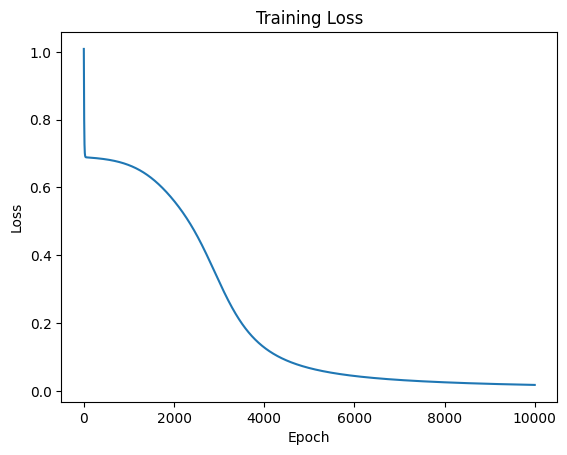

Input: tensor([0., 0.]) Prediction: 0.0023931001778692007
Input: tensor([0., 1.]) Prediction: 0.9812747836112976
Input: tensor([1., 0.]) Prediction: 0.9815561771392822
Input: tensor([1., 1.]) Prediction: 0.029981672763824463


In [19]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("mps" if torch.cuda.is_available() else "cpu") # for GPU or CPU
# device = torch.device("mps") # for Mac M1 chip
print("device :",device)

# set reproducibility to get the same results using numpy and torch

input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

# Set the seed for reproducibility
np.random.seed(314)
# Generate initial weights and biases using NumPy
theta1 = np.random.rand(hidden_size, input_size).astype(np.float32)
theta2 = np.random.rand(output_size, hidden_size).astype(np.float32)
bias1 = np.random.rand(hidden_size).astype(np.float32)
bias2 = np.random.rand(output_size).astype(np.float32)


# XOR Data
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
print('X', X.shape)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

# Model definition
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x
# Initialize the model
model = XORNet()
# print(model)

# Manually set the weights and biases
model.layer1.weight.data = torch.tensor(theta1,dtype=torch.float32)  # Transpose the weight matrix to match PyTorch's shape
model.layer1.bias.data = torch.tensor(bias1,dtype=torch.float32)
model.layer2.weight.data = torch.tensor(theta2,dtype=torch.float32)  # Transpose the weight matrix to match PyTorch's shape
model.layer2.bias.data = torch.tensor(bias2,dtype=torch.float32)

# Print model parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        
# Binary Cross Entropy Loss
# By defaul, reduction='mean': the sum of the output will be divided by the number of elements in the output
loss_function = nn.BCELoss() 

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    Y_pred = model(X)
    loss = loss_function(Y_pred, Y)
    losses.append(loss.item())

    # Backward pass and automatic update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 1000 epochs
    if (epoch+1) % 1000 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.5f}')

# print the last losses
print(f"losses: {losses[-1]}")
# Plot the Loss over Time
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Test the model
with torch.no_grad():
    Y_pred = model(X)
    for i in range(Y_pred.size(0)):
        print(f"Input: {X[i]}", f"Prediction: {Y_pred[i][0]}")
    # predicted = Y_pred.round()
    # accuracy = (predicted.eq(Y).sum().float() / Y.size(0)).item()
    # print(f'Accuracy: {accuracy * 100:.2f}%')
